HBox(children=(RadioButtons(description='Speed: ', index=1, options=('Wpm', 'Adjusted-Wpm'), value='Adjusted-Wpm'), RadioButtons(description='Accuracy: ', options=('Total-Error-Rate', 'Uncorrected-Error-Rate', 'Corrected-Error-Rate'), value='Total-Error-Rate')))

ToggleButtons(description='Metric: ', index=5, options=('Speed', 'Accuracy', 'Speed & Accuracy', 'Learning Curve', 'Speed Vs. Accuracy', 'Proof error-correction'), value='Proof error-correction')

HBox(children=(Select(description='Participant: ', options=('All', '#1', '#2', '#3', '#4', '#5', '#6'), value='All'),))

<IPython.core.display.Javascript object>


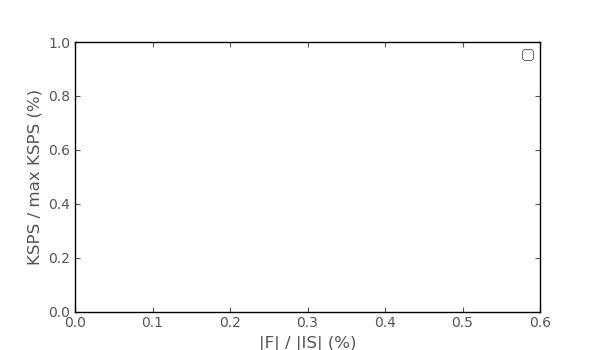

No handles with labels found to put in legend.


[[0.949902187123456, 0.39091998674326417, 0.6257166278532585, 0.5957611707276037, 1.2119765610446274, 1.0140966465409955, 1.009080848237361, 1.0, 0.47208632762866914, 0.7693606841569581, 0.7341732573475404, 0.9925265192586138, 0.9784227638537188, 1.4846411461047877, 0.6891250832379753, 1.2972381508843507, 1.1751325969606057, 0.9696799219662705, 1.2540151346347284, 1.4597174102339538, 0.8342588761625557, 1.6371062491445347, 0.8603617483083255, 1.6399713139133776, 0.6576709801593018, 1.342329019840698, 0.8321448291150839, 1.07240921200305, 0.8272432627814426, 0.6175900474813415, 1.0, 0.9886957928098101, 1.3624785416069465, 0.9880120946083746, 0.9765634136350364, 0.9378099136543274, 0.8143394676331409, 1.353081644922242, 1.4700553438807151, 1.2695601960279712, 1.1101206927234564, 1.1214803166482532, 1.0931441104048671, 0.567365812343185, 0.49837105650369984, 1.0847998292258156, 0.7169987835946131, 0.9195376766824058, 0.9526641288008524, 0.7434900497918601, 0.9202811835767536, 1.0761664846

In [91]:
%matplotlib notebook	
import csv
from __future__ import print_function
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np

class Sentence:
	# class variables here
	def __init__(self, participant, sentenceNo, testing):
		# instance variables here
		self.participant = participant
		self.sentenceNo = sentenceNo
		self.testing = testing		# 0: practice; 1: test
		self.keyboard = 0			# 0: win EyeControl; 1: tobii WinControl; 2: tobii Dwell-free
		self.wpm = 0.0
		self.adjWpm = 0.0
		self.totErrRate = 0.0
		self.uncErrRate = 0.0
		self.corErrRate = 0.0
		self.ksps = 0.0
		self.f = 0.0
		self.inputStream = 0.0

def readSentences(argFilename, argSentences):
	with open('Raw-Data/Logs/'+argFilename+'.csv') as csvDataFile:
		csvReader = csv.reader(csvDataFile)
		next(csvReader, None)
		next(csvReader, None)
		for row in csvReader:
			argSentences.append(Sentence(int(argFilename[0])-1, int(row[0]), int(row[1])))
			# exclude exceptions that the test participant didn't enter anything and skipped this sentence			
			if row[3] != 0:			
				sentences[-1].wpm = float(row[3])
				sentences[-1].adjWpm = float(row[4])
				sentences[-1].totErrRate = float(row[11])
				sentences[-1].uncErrRate = float(row[9])
				sentences[-1].corErrRate = float(row[10])				
				sentences[-1].keyboard = ord(argFilename[4])-65
				sentences[-1].ksps = float(row[6])
				sentences[-1].f = float(row[19])	# fixed keystrokes
				sentences[-1].inputStream = float(row[22])	# input stream

def clearCache():
	clear_output(wait=True)
	display(widgets.HBox([contrSpeed,contrErrRate]), contrMetric, widgets.HBox([contrPtcp]))
	# clear data storage
	dataStorage = [perPtcpWpm, perPtcpAdjWpm, perPtcpTotErrRate, perPtcpUncErrRate, perPtcpCorErrRate, perPtcpSentenceNo, perPtcpKsps, perPtcpF, perPtcpInputStream]
	for item in dataStorage:
		for index in range(amountPtcp*amountKeyboard):
			del item[index][:]

def onChange_speedOrAccuracy(change):
	if change['type']=='change' and change['name']=='value':
		plotsHub()

def onChange_metric(b):
	if b['type']=='change' and b['name']=='value':
		plotsHub()

def onChange_ptcp(change):
	if change['type']=='change' and change['name']=='value':
		plotsHub()

def plotsHub():
	clearCache()
	# extract sentences according to participant selection
	for item in sentences:
		if item.testing == 1:
			if contrPtcp.value != 'All':
				index = (int(contrPtcp.value[1])-1)*amountKeyboard+item.keyboard
				selectedPtcp = [int(contrPtcp.value[1])-1]
			else:
				# data structure here
				index = item.participant*amountKeyboard+item.keyboard
				selectedPtcp = [i for i in range(amountPtcp)]
			if item.participant in selectedPtcp:
				perPtcpWpm[index].append(item.wpm)
				perPtcpAdjWpm[index].append(item.adjWpm)
				perPtcpTotErrRate[index].append(item.totErrRate)
				perPtcpUncErrRate[index].append(item.uncErrRate)
				perPtcpCorErrRate[index].append(item.corErrRate)
				perPtcpSentenceNo[index].append(item.sentenceNo)
				perPtcpKsps[index].append(item.ksps)
				perPtcpF[index].append(item.f)
				perPtcpInputStream[index].append(item.inputStream)
	filter()

	if 'Speed' == contrMetric.value:
		plotSpeed()
	elif 'Accuracy' == contrMetric.value:
		plotAccuracy()
	elif 'Speed & Accuracy' == contrMetric.value:
		plotSpeedNAccuracy()
	elif 'Learning' in contrMetric.value:
		plotLearningCurve()
	elif 'Speed Vs. Accuracy' == contrMetric.value:
		plotSpeedVsAccuracy()
	elif 'Proof error-correction' == contrMetric.value:
		plotProof()

def filter():
	dataStorages = [perPtcpWpm, perPtcpAdjWpm, perPtcpTotErrRate, perPtcpUncErrRate, perPtcpCorErrRate, perPtcpSentenceNo, perPtcpKsps, perPtcpF, perPtcpInputStream]
	for i in range(len(perPtcpAdjWpm)):
		if len(perPtcpAdjWpm[i]):
			mean = np.nanmean(perPtcpAdjWpm[i])
			sd = np.std(perPtcpAdjWpm[i])
			for j in range(len(perPtcpAdjWpm[i])):
				global globalCounter
				globalCounter += 1
				# remove outliers that beyond 2SD from mean
				if (np.absolute(perPtcpAdjWpm[i][j] - mean) >= 2 * sd) or (perPtcpAdjWpm[i][j] <= 0):
					# count how many outliers in the dataset
					global globalOutlierCounter
					globalOutlierCounter += 1
					perPtcpWpm[i][j] = perPtcpAdjWpm[i][j] = perPtcpTotErrRate[i][j] = perPtcpUncErrRate[i][j] = perPtcpCorErrRate[i][j] = perPtcpKsps[i][j] = perPtcpF[i][j] = np.NaN

def plotSpeed():
	with plt.rc_context({'axes.edgecolor':'black', 'axes.facecolor':'white'}):
		fig, ax = plt.subplots(figsize=(5,3), dpi=300)
		ax.grid(color='gray', alpha=0.3, axis='y')
		ax.tick_params(axis='both', direction='in', top=True, right=True)		
	ax.set(ylabel='Adjusted words per minute')
	plt.ylim(0,25)
	yWpm = [[] for i in range(amountKeyboard)]
	if contrSpeed.value == 'Wpm':
		plotPerPtcpWpm = perPtcpWpm
	elif contrSpeed.value == 'Adjusted-Wpm':
		plotPerPtcpWpm = perPtcpAdjWpm
	for index in range(len(plotPerPtcpWpm)):
		for subIndex in range(len(plotPerPtcpWpm[index])):
			yWpm[index%amountKeyboard].append(plotPerPtcpWpm[index][subIndex])
	# handle missing data due to data preprocessing
	for j in range(amountKeyboard):	
		nanIndex = []
		for i in range(len(yWpm[j])):
			if np.isnan(yWpm[j][i]):
				nanIndex.append(i)
		for i in range(len(nanIndex)):
			yWpm[j].pop(nanIndex[i]-i)
	# adjust keyboard order as WinControl, EyeControl, and Dwell-free
	plt.boxplot(yWpm[0], positions=[plotXPosition[1]], showfliers=True, patch_artist=True, 
					boxprops=dict(facecolor=color[0]), medianprops=dict(linewidth=1, linestyle=None, color='white'),widths=0.3)
	plt.boxplot(yWpm[1], positions=[plotXPosition[0]], showfliers=True, patch_artist=True, 
					boxprops=dict(facecolor=color[1]), medianprops=dict(linewidth=1, linestyle=None, color='white'),widths=0.3)
	plt.boxplot(yWpm[2], positions=[plotXPosition[2]], showfliers=True, patch_artist=True, 
					boxprops=dict(facecolor=color[2]), medianprops=dict(linewidth=1, linestyle=None, color='white'),widths=0.3)
	plt.xlim(min(plotXPosition)-1, max(plotXPosition)+1)	
	plt.xticks(plotXPosition, axisKeybd)
	fig.savefig('plotSpeed_'+contrPtcp.value+'.png', bbox_inches='tight')

def plotAccuracy():
	with plt.rc_context({'axes.edgecolor':'black', 'axes.facecolor':'white'}):
		fig, ax = plt.subplots(figsize=(5,3), dpi=300)
		ax.grid(color='gray', alpha=0.3, axis='y')
		ax.tick_params(axis='both', direction='in', top=True, right=True)
	ax.set(ylabel='Total error rate')
	plt.ylim(0,1)
	yErrRate = [[] for i in range(amountKeyboard)]
	if contrErrRate.value == 'Total-Error-Rate':
		plotPerPtcpErrRate = perPtcpTotErrRate
	elif contrErrRate.value == 'Uncorrected-Error-Rate':
		plotPerPtcpErrRate = perPtcpUncErrRate
	elif contrErrRate.value == 'Corrected-Error-Rate':
		plotPerPtcpErrRate = perPtcpCorErrRate
	for index in range(len(plotPerPtcpErrRate)):
		for subIndex in range(len(plotPerPtcpErrRate[index])):
			yErrRate[index%amountKeyboard].append(plotPerPtcpErrRate[index][subIndex])
	# handle missing data due to data preprocessing
	for j in range(amountKeyboard):	
		nanIndex = []
		for i in range(len(yErrRate[j])):
			if np.isnan(yErrRate[j][i]):
				nanIndex.append(i)
		for i in range(len(nanIndex)):
			yErrRate[j].pop(nanIndex[i]-i)
	# adjust keyboard order as WinControl, EyeControl, and Dwell-free
	plt.boxplot(yErrRate[0], positions=[plotXPosition[1]], showfliers=True, patch_artist=True, 
					boxprops=dict(facecolor=color[0]), medianprops=dict(linewidth=1, linestyle=None, color='white'),widths=0.3)
	plt.boxplot(yErrRate[1], positions=[plotXPosition[0]], showfliers=True, patch_artist=True, 
					boxprops=dict(facecolor=color[1]), medianprops=dict(linewidth=1, linestyle=None, color='white'),widths=0.3)
	plt.boxplot(yErrRate[2], positions=[plotXPosition[2]], showfliers=True, patch_artist=True, 
					boxprops=dict(facecolor=color[2]), medianprops=dict(linewidth=1, linestyle=None, color='white'),widths=0.3)
	plt.xlim(min(plotXPosition)-1, max(plotXPosition)+1)	
	plt.xticks(plotXPosition, axisKeybd)
	fig.savefig('plotAccuracy_'+contrPtcp.value+'.png', bbox_inches='tight')

def plotSpeedNAccuracy():
	fig, ax = plt.subplots()
	ax.set(title=contrPtcp.value+' participant(s)'+' average typing speed', xlabel='Keyboard', ylabel='AdjWPM')
	plt.ylim(0,15.2)
	yWpm, sdTotErrRate = ([[] for i in range(amountKeyboard)] for j in range(2))
	if contrSpeed.value == 'Wpm':
		plotPerPtcpWpm = perPtcpWpm
	elif contrSpeed.value == 'Adjusted-Wpm':
		plotPerPtcpWpm = perPtcpAdjWpm
	if contrErrRate.value == 'Total-Error-Rate':
		plotPerPtcpErrRate = perPtcpTotErrRate
	elif contrErrRate.value == 'Uncorrected-Error-Rate':
		plotPerPtcpErrRate = perPtcpUncErrRate
	elif contrErrRate.value == 'Corrected-Error-Rate':
		plotPerPtcpErrRate = perPtcpCorErrRate
	for index in range(len(plotPerPtcpWpm)):
		for subIndex in range(len(plotPerPtcpWpm[index])):
			yWpm[index%amountKeyboard].append(plotPerPtcpWpm[index][subIndex])
			sdTotErrRate[index%amountKeyboard].append(plotPerPtcpErrRate[index][subIndex])
	for i in range(amountKeyboard):
		plt.bar(i+1,np.nanmean(yWpm[i]),0.5,color=color[i],label=labelKeybd[i],alpha=0.6)		
	for i in range(amountKeyboard):
		if i == 0:
			eb = plt.errorbar(i+1,np.nanmean(yWpm[i]),np.nanmean(sdTotErrRate[i])*np.nanmean(yWpm[i]),
						color='gray',elinewidth=1,capsize=3,label='Associated error range')
		else:
			eb = plt.errorbar(i+1,np.nanmean(yWpm[i]),np.nanmean(sdTotErrRate[i])*np.nanmean(yWpm[i]),
						color='gray',elinewidth=1,capsize=3)
		eb[-1][0].set_linestyle('--')
	plt.xlim(min(plotXPosition)-1, max(plotXPosition)+1)	
	plt.xticks(plotXPosition, axisKeybd)
	ax.legend(loc='upper left')	
	fig.savefig('plotSpeedNAccuracy_'+contrPtcp.value+'.png', bbox_inches='tight')

def plotLearningCurve():
	labelLearningCurve = ['EyeControl\nCorr.:0.85', 'WinControl\nCorr.:0.61', 'Dwell-free\nCorr.0.65']
	# labelLearningCurve = ['EyeControl', 'WinControl', 'Dwell-free']
	with plt.rc_context({'axes.edgecolor':'black', 'axes.facecolor':'white'}):
		fig, ax = plt.subplots(figsize=(6,3.5), dpi=300)
	if contrSpeed.value == 'Wpm':
		plotPerPtcpWpm = perPtcpWpm
	elif contrSpeed.value == 'Adjusted-Wpm':
		plotPerPtcpWpm = perPtcpAdjWpm
	if contrErrRate.value == 'Total-Error-Rate':
		plotPerPtcpErrRate = perPtcpTotErrRate
	elif contrErrRate.value == 'Uncorrected-Error-Rate':
		plotPerPtcpErrRate = perPtcpUncErrRate
	elif contrErrRate.value == 'Corrected-Error-Rate':
		plotPerPtcpErrRate = perPtcpCorErrRate
	if contrPtcp.value != 'All':
		for index in range(len(plotPerPtcpWpm)):
			if len(plotPerPtcpWpm[index]):
				sdError = [a*b for a,b in zip(plotPerPtcpWpm[index], plotPerPtcpErrRate[index])]
				eb = plt.errorbar(perPtcpSentenceNo[index],plotPerPtcpWpm[index],sdError,
					fmt='.-',color=color[index],elinewidth=6,capsize=3,label=labelKeybd[index],alpha=0.5)
				eb[-1][0].set_linestyle('--')
	else:
		yPerSentenceWpm, yPerSentenceTotErrRate = ([[([0]*15) for i in range(amountPtcp)] for j in range(amountKeyboard)] for k in range(2))
		tmpPerSentenceNo = [j for j in range(4,19)]
		coefficientsKeybds = []
		for index in range(len(plotPerPtcpWpm)):
			for indexSub in range(len(plotPerPtcpWpm[index])):
				i = tmpPerSentenceNo.index(perPtcpSentenceNo[index][indexSub])
				yPerSentenceWpm[index%amountKeyboard][index//amountKeyboard][i] = plotPerPtcpWpm[index][indexSub]
				yPerSentenceTotErrRate[index%amountKeyboard][index//amountKeyboard][i] = plotPerPtcpErrRate[index][indexSub]
		yWpm, sdTotErrRate = ([([0]*15)for p in range(amountKeyboard)] for q in range(2))
		for i in range(amountKeyboard):
			for j in range(15):
				bufferWpm, bufferErrRate = ([] for q in range(2))
				for k in range(amountPtcp):
					if (yPerSentenceWpm[i][k][j] != 0.0) and (np.isnan(yPerSentenceWpm[i][k][j]) == False):
						bufferWpm.append(yPerSentenceWpm[i][k][j])
						bufferErrRate.append(yPerSentenceTotErrRate[i][k][j])
					else:
						bufferWpm.append(np.NaN)
						bufferErrRate.append(np.NaN)
				if len(bufferWpm) <= amountPtcp: # threshold = 0.3
					yWpm[i][j] = np.nanmean(bufferWpm)
					sdTotErrRate[i][j] = np.nanmean(bufferErrRate)
				else:
					yWpm[i][j] = 0
					sdTotErrRate[i][j] = 0
			# data fitting
			x = range(4, 19)
			coefficients = np.polyfit(sdTotErrRate[i], yWpm[i], 1)
			coefficientsKeybds.append(coefficients)
			# plt.plot([q for q in range(4,19)], sdTotErrRate[i], color=color[i], linewidth=0.5, alpha=0.3)
		plt.scatter(sdTotErrRate[0], yWpm[0], color=color[0], s=20, label=labelLearningCurve[0])
		plt.scatter(sdTotErrRate[1], yWpm[1], color=color[1], s=20, label=labelLearningCurve[1])
		plt.scatter(sdTotErrRate[2], yWpm[2], color=color[2], s=20, label=labelLearningCurve[2], marker='D')

		for i in range(amountKeyboard):
			xForPlots = sdTotErrRate[i]
			yForPlots = []
			for eachXForPlots in xForPlots:
				yForPlots.append(coefficientsKeybds[i][0]*eachXForPlots + coefficientsKeybds[i][1])
			plt.plot(xForPlots, yForPlots, color=color[i], linewidth=1)
			# corrcoef = np.corrcoef(yWpm[i], yForPlots)[1,0]
			# print(corrcoef)
	ax.set(xlabel='Total error rate', ylabel='Adjusted words per minute')
	ax.tick_params(axis='both', direction='in', top=True, right=True)
	ax.legend(loc='upper center', facecolor='white', edgecolor='black', ncol=3)
	# ax.grid(color='gray', alpha=0.3, axis='both')
	plt.ylim(0,15)
	plt.xlim(0, 1)
	fig.savefig('plotLearningCurve_'+contrPtcp.value+'.png', bbox_inches='tight')

def plotSpeedVsAccuracy():
	with plt.rc_context({'axes.edgecolor':'black', 'axes.facecolor':'white'}):
		fig, ax = plt.subplots(figsize=(6,3.5), dpi=300)
		ax.grid(color='gray', alpha=0.3, axis='y')
		ax.tick_params(axis='both', direction='in', top=True, right=True)
	xSpeed, yErrRate = ([[], [], []] for i in range(2))
	if contrSpeed.value == 'Wpm':
		plotPerPtcpWpm = perPtcpWpm
	elif contrSpeed.value == 'Adjusted-Wpm':
		plotPerPtcpWpm = perPtcpAdjWpm
	if contrErrRate.value == 'Total-Error-Rate':
		plotPerPtcpErrRate = perPtcpTotErrRate
	elif contrErrRate.value == 'Uncorrected-Error-Rate':
		plotPerPtcpErrRate = perPtcpUncErrRate
	elif contrErrRate.value == 'Corrected-Error-Rate':
		plotPerPtcpErrRate = perPtcpCorErrRate
	for index in range(len(plotPerPtcpWpm)):
		if len(plotPerPtcpWpm[index]):
			for indexSub in range(len(plotPerPtcpWpm[index])):
				if (plotPerPtcpWpm[index][indexSub] != 0) and (np.isnan(plotPerPtcpWpm[index][indexSub]) == False):
					xSpeed[index%amountKeyboard].append(plotPerPtcpWpm[index][indexSub])
					yErrRate[index%amountKeyboard].append(plotPerPtcpErrRate[index][indexSub])
	# fig, ax = plt.subplots()
	for i in range(amountKeyboard):
		plt.scatter(xSpeed[i], yErrRate[i], color=color[i], label=labelKeybd[i],s=10)
	ax.legend(loc='upper right', facecolor='white', edgecolor='black')
	# ax.set_xscale('log', basex=2)
	ax.set(xlabel='Adjusted words per minute', ylabel='Total error rate')
	plt.ylim(-0.05, 1)
	plt.xlim(-0.05,25)
	fig.savefig('plotWpmVsAccuracy_'+contrPtcp.value+'.png', bbox_inches='tight')

def plotProof():
	with plt.rc_context({'axes.edgecolor':'black', 'axes.facecolor':'white'}):
		fig, ax = plt.subplots(figsize=(6,3.5), dpi=100)
		ax.tick_params(axis='both', direction='in', top=True, right=True)
	totErrorRate, sentenceNo, ksps, f, inputStream = ([[], [], []] for i in range(5))
	for index in range(len(perPtcpAdjWpm)):
		if len(perPtcpAdjWpm[index]):
			for indexSub in range(len(perPtcpAdjWpm[index])):
				if (perPtcpAdjWpm[index][indexSub] != 0) and (np.isnan(perPtcpAdjWpm[index][indexSub]) == False):
					f[index%amountKeyboard].append(perPtcpF[index][indexSub])
					inputStream[index%amountKeyboard].append(perPtcpInputStream[index][indexSub])
					ksps[index%amountKeyboard].append(perPtcpKsps[index][indexSub])
					sentenceNo[index%amountKeyboard].append(perPtcpSentenceNo[index][indexSub])
					totErrorRate[index%amountKeyboard].append(perPtcpTotErrRate[index][indexSub])	
	# compute max KSPS
	plotY = getMaxKSPS(ksps, sentenceNo, totErrorRate)
	plotX = [[], [], []]
	for i in range(amountKeyboard):
		for j in range(len(f[i])):
			plotX[i].append(f[i][j] / inputStream[i][j])
		# plt.scatter(plotX[i], plotY[i], color=color[i], label=labelKeybd[i], s=10)
	ax.legend(loc='upper right', facecolor='white', edgecolor='black')
	ax.set(xlabel='|F| / |IS| (%)', ylabel='KSPS / max KSPS (%)')
	plt.xlim(0, 0.6)
	fig.savefig('plotProof'+contrPtcp.value+'.png', bbox_inches='tight')

# get max KSPS for each participant per keyboard
def getMaxKSPS(paramKSPS, paramSentenceNo, paramTotErrorRate):
	amountParticipants = 5
	maxKspss = [[] for i in range(amountKeyboard)]
	maxKspsCandidates, kspsPerPtcpPerKeybd, totErrorRatePerPtcpPerKeybd = ([[[] for i in range(amountParticipants)] for j in range(amountKeyboard)] for k in range(3))
	for i in range(amountKeyboard):
		counterParticipant = 0
		tmp = paramSentenceNo[i][0]
		for j in range(len(paramSentenceNo[i])):
			if paramSentenceNo[i][j] < tmp:
				counterParticipant += 1
			kspsPerPtcpPerKeybd[i][counterParticipant].append(paramKSPS[i][j])
			if paramTotErrorRate[i][j] <= 0.05:
				maxKspsCandidates[i][counterParticipant].append(paramKSPS[i][j])
			tmp = paramSentenceNo[i][j]

	plotY = [[], [], []]
	for i in range(amountKeyboard):
		for j in range(amountParticipants):
			if len(maxKspsCandidates[i][j]):
				maxKspss[i].append(np.mean(maxKspsCandidates[i][j]))
			else:
				maxKspss[i].append(max(kspsPerPtcpPerKeybd[i][j]))
			for k in range(len(kspsPerPtcpPerKeybd[i][j])):
				plotY[i].append(kspsPerPtcpPerKeybd[i][j][k] / maxKspss[i][j])
	print(plotY)
	return plotY

if __name__=="__main__":
	amountPtcp=6
	amountKeyboard=3
	sentences=[]
	perPtcpWpm, perPtcpAdjWpm, perPtcpTotErrRate, perPtcpUncErrRate, perPtcpCorErrRate, perPtcpSentenceNo, perPtcpKsps, perPtcpF, perPtcpInputStream = ([[] for j in range(amountPtcp*amountKeyboard)] for i in range(9))
	plotXPosition = [1,2,3]
	labelKeybd = ['EyeControl', 'WinControl', 'Dwell-free'] * 6
	axisKeybd = ['WinControl', 'EyeControl', 'Dwell-free'] * 6
	color = ['#9400FF', '#14CC61','#FFAA19'] * 6 

	filenames = ['2_kbA_logs', '2_kbB_logs', '2_kbC_logs',
				'3_kbA_logs', '3_kbB_logs', '3_kbC_logs',
				'4_kbA_logs', '4_kbB_logs', '4_kbC_logs',
				'5_kbA_logs', '5_kbB_logs', '5_kbC_logs',
				'6_kbA_logs', '6_kbB_logs', '6_kbC_logs']

	for item in filenames:
		readSentences(item, sentences)

	contrSpeed = widgets.RadioButtons(
		options=['Wpm', 'Adjusted-Wpm'],
		description='Speed: ',
		value='Adjusted-Wpm',
		disabled=False
		)
	contrErrRate = widgets.RadioButtons(
		options=['Total-Error-Rate', 'Uncorrected-Error-Rate', 'Corrected-Error-Rate'],
		description='Accuracy: ',
		value='Total-Error-Rate',
		disabled=False
		)
	contrMetric = widgets.ToggleButtons(
		options=['Speed', 'Accuracy', 'Speed & Accuracy', 'Learning Curve', 'Speed Vs. Accuracy', 'Proof error-correction'],
		description='Metric: ',
		value='Accuracy',
		disabled=False
		)
	contrPtcp = widgets.Select(
		options=['All', '#1', '#2', '#3', '#4', '#5', '#6'],
		description='Participant: ',
		value='All',
		disabled=False
		)
	display(widgets.HBox([contrSpeed,contrErrRate]), contrMetric, widgets.HBox([contrPtcp]))
	contrMetric.observe(onChange_metric)
	contrPtcp.observe(onChange_ptcp)
	contrSpeed.observe(onChange_speedOrAccuracy)
	contrErrRate.observe(onChange_speedOrAccuracy)

	globalOutlierCounter = 0
	globalCounter = 0

In [ ]:
# Wpm: words per minute regardless its correctness
# Adjusted-Wpm: words per minute regarding corrected input
# otal-Error-Rate: the ratio of error (both corrected and uncorrected) and the whole input stream
# Uncorrected-Error-Rate: the ratio of uncorrected error and the whole input stream
# Corrected-Error-Rate: the ratio of corrected error and the whole input stream